In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get dataframes

exports_per_year = pd.read_csv('../output_data/exports_per_year.csv')
exports_per_year

,Unnamed: 0,year,location_code,hs_product_code,export_value
0,0,2004,Aguascalientes,112511,0.0
1,1,2004,Aguascalientes,112512,0.0
2,2,2004,Aguascalientes,114111,0.0
3,3,2004,Aguascalientes,114112,0.0
4,4,2004,Aguascalientes,114113,0.0
...,...,...,...,...,...
105243,105243,2019,Zacatecas,813110,442.0
105244,105244,2019,Zacatecas,813120,598.0
105245,105245,2019,Zacatecas,813130,73.0
105246,105246,2019,Zacatecas,813140,0.0


In [3]:
exports_per_year['hs_product_code_str']=exports_per_year['hs_product_code'].astype(str)

#exports_per_year.loc[exports_per_year['hs_product_code_str']]

sectors_SCIAN_dict={'Agriculture':'11','Mining':'21','Energy':'22',
                   'Building':'23','Manufacture':'3','Trades':('43','46'),
                   'Transport':'4','Services':('5','6','7','8')
                   }

exports_per_year.loc[exports_per_year['hs_product_code_str'].str.startswith('11', na=False)].values[0]

locations=exports_per_year['location_code'].unique()

years=exports_per_year['year'].unique()

year_loc_sector_val=[]
for year in years:
    for loc in locations:
        
        export_df=exports_per_year.loc[exports_per_year['year']==year].loc[exports_per_year['location_code']==loc]
        
        exp_val_tot=export_df['export_value'].values.sum()
        
        for sector in sectors_SCIAN_dict.keys():
            
            export_df_sector=export_df.loc[exports_per_year['hs_product_code_str'].str.startswith(sectors_SCIAN_dict[sector], na=False)]
            
            exp_val=export_df_sector['export_value'].values.sum()
            
            exp_per=exp_val/exp_val_tot*100
            
            
            year_loc_sector_val.append([year,loc,sector,exp_val,exp_per])
        
exports_per_sector=pd.DataFrame(year_loc_sector_val,columns=['year','location_code','sector','val','%val'])
exports_per_sector

,year,location_code,sector,val,%val
0,2004,Aguascalientes,Agriculture,0.0,0.000000
1,2004,Aguascalientes,Mining,696.0,0.445101
2,2004,Aguascalientes,Energy,0.0,0.000000
3,2004,Aguascalientes,Building,3341.0,2.136613
4,2004,Aguascalientes,Manufacture,47949.0,30.664006
...,...,...,...,...,...
1019,2019,Zacatecas,Building,5427.0,2.721310
1020,2019,Zacatecas,Manufacture,38422.0,19.266294
1021,2019,Zacatecas,Trades,76900.0,38.560669
1022,2019,Zacatecas,Transport,80278.0,40.254531


In [4]:
exports_per_sector.loc[exports_per_sector['year']==year].loc[exports_per_sector['location_code']==loc]

,year,location_code,sector,val,%val
1016,2019,Zacatecas,Agriculture,731.0,0.366552
1017,2019,Zacatecas,Mining,2358.0,1.182393
1018,2019,Zacatecas,Energy,0.0,0.000000
1019,2019,Zacatecas,Building,5427.0,2.721310
1020,2019,Zacatecas,Manufacture,38422.0,19.266294
1021,2019,Zacatecas,Trades,76900.0,38.560669
1022,2019,Zacatecas,Transport,80278.0,40.254531
1023,2019,Zacatecas,Services,72210.0,36.208920


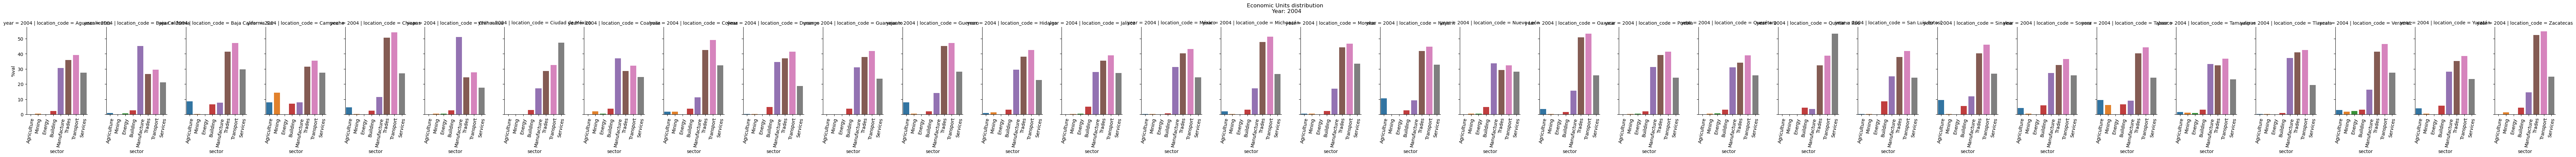

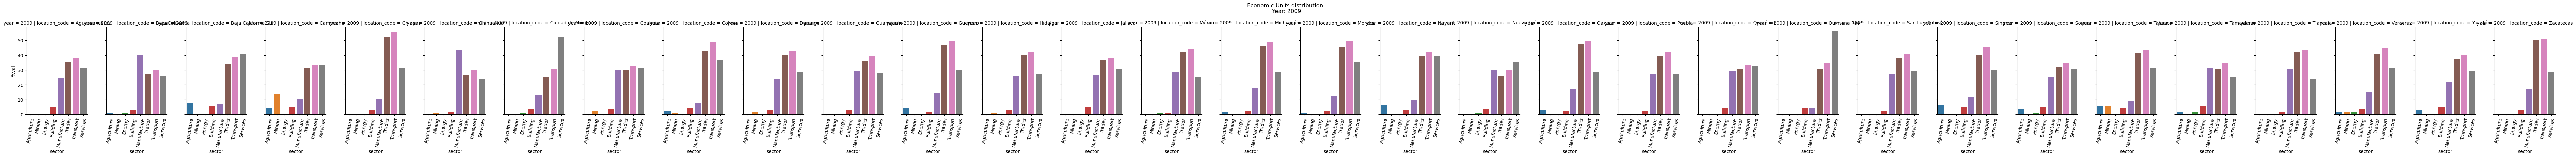

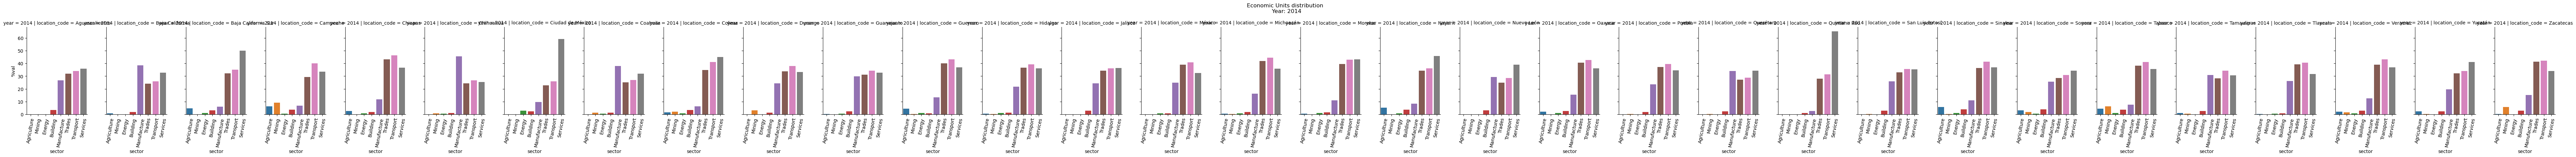

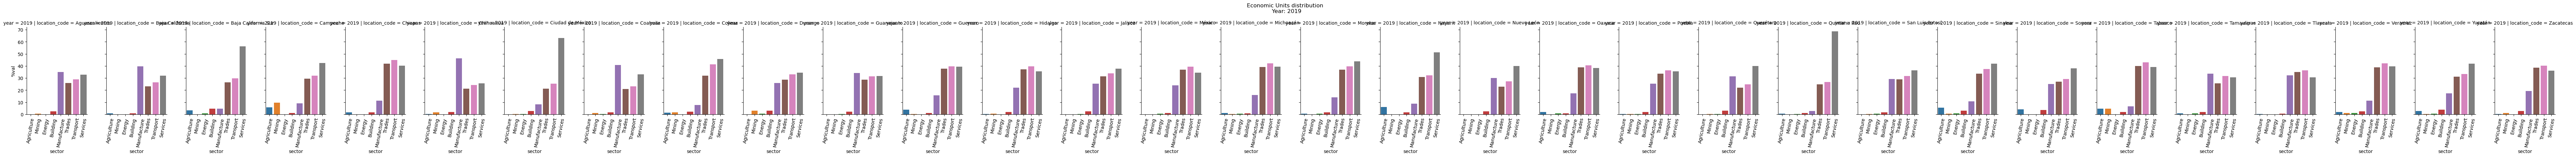

In [5]:
import seaborn as sns

for year in years:
    g=sns.catplot(
        data=exports_per_sector.loc[exports_per_sector['year']==year], x="sector", y="%val", col="location_code",row='year',
        kind="bar", height=4, aspect=.6,
    )
    g.set_xticklabels(rotation=80)

    g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
    g.fig.suptitle(f'Number of Employees \n Year: {year}')
    plt.show()

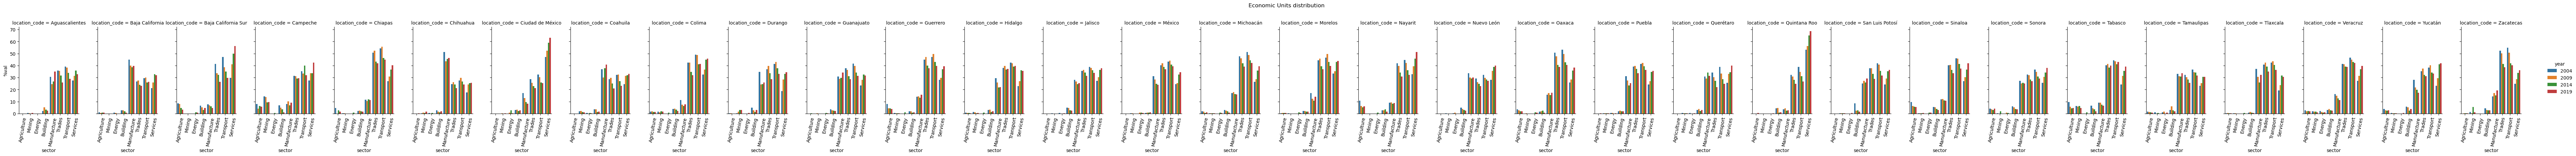

In [6]:
g=sns.catplot(
        data=exports_per_sector, x="sector", y="%val", col="location_code",hue='year',
        kind="bar", height=4, aspect=.6,
    )
g.set_xticklabels(rotation=80)

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle(f'Number of Employees distribution')
plt.show()



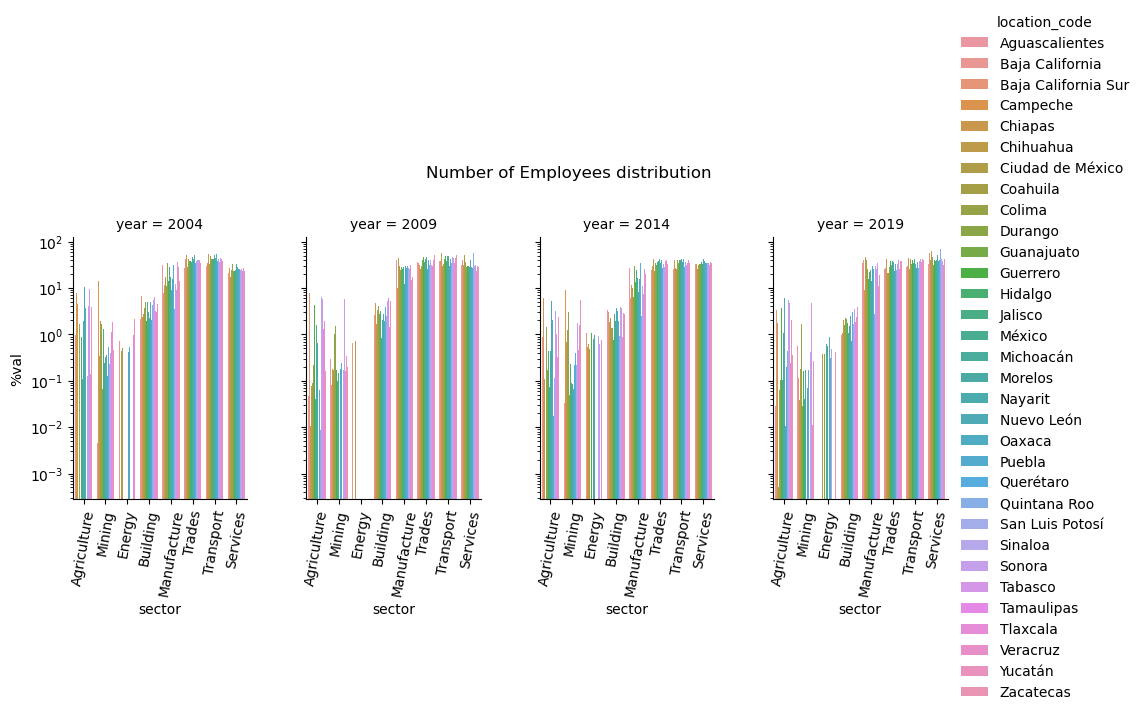

In [9]:
g=sns.catplot(
        data=exports_per_sector, x="sector", y="%val", col="year",hue='location_code',
        kind="bar", height=4, aspect=.6,
    )
g.set_xticklabels(rotation=80)

g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle(f'Number of Employees distribution')
plt.yscale('log')

plt.show()

